<p style="background-color:#D2D4C8;font-family:ui-rounded;color:#000000;font-size:250%;text-align:center;border-radius:30px 30px;">End_To_End_Potato-classification-->99% acc</p>


<p style="background-color:#D2D4C8;font-family:ui-rounded;color:#000000;font-size:200%;text-align:center;border-radius:30px 30px;"><a href="https://github.com/0Xuser100/Projects/tree/main/Streamlit%20End%20to%20End%20Plant_Disease_CNN_Image_Classifier" style="color:#000000; text-decoration:none;"> Click Her To Go To End_To_End_project link</a></p>


<p style="background-color:#D2D4C8;font-family:ui-rounded;color:#FF0000;font-size:200%;text-align:center;border-radius:10px 10px;">Import Needed Libraries</p>


In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os 

2024-05-01 16:08:04.235411: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 16:08:04.235539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 16:08:04.429223: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Set all the Constants</p>


In [2]:
Image_Size = 256
Batch_Size = 32
Channels = 3
Epochs =30

<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">prepare  data </p>


In [3]:
dir=os.listdir('/kaggle/input/plant-village/PlantVillage')
for i in dir:
    print(i)

Pepper__bell___Bacterial_spot
Potato___healthy
Tomato_Leaf_Mold
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Bacterial_spot
Tomato_Septoria_leaf_spot
Tomato_healthy
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Early_blight
Tomato__Target_Spot
Pepper__bell___healthy
Potato___Late_blight
Tomato_Late_blight
Potato___Early_blight
Tomato__Tomato_mosaic_virus


In [4]:
!cp -rf ../input/plant-village/PlantVillage/Potato___Early_blight ./Potato___Early_blight
!cp -rf ../input/plant-village/PlantVillage/Potato___Late_blight ./Potato___Late_blight
!cp -rf ../input/plant-village/PlantVillage/Potato___healthy ./Potato___healthy

In [5]:
#to remove all files in this dir
#!rm -rf /kaggle/working/*
#to remove one dir
#rm -rf Tomato_Leaf_Mold

In [6]:
# !cp -rf ../input/plant-village/PlantVillage/Tomato_Leaf_Mold ./Tomato_Leaf_Mold
# !cp -rf ../input/plant-village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus ./Tomato__Tomato_YellowLeaf__Curl_Virus
# !cp -rf ../input/plant-village/PlantVillage/Tomato_Bacterial_spot ./Tomato_Bacterial_spot
# !cp -rf ../input/plant-village/PlantVillage/Tomato_Septoria_leaf_spot ./Tomato_Septoria_leaf_spot
# !cp -rf ../input/plant-village/PlantVillage/Tomato_healthy ./Tomato_healthy
# !cp -rf ../input/plant-village/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite ./Tomato_Spider_mites_Two_spotted_spider_mite
# !cp -rf ../input/plant-village/PlantVillage/Tomato_Early_blight ./Tomato_Early_blight
# !cp -rf ../input/plant-village/PlantVillage/Tomato__Target_Spot ./Tomato__Target_Spot
# !cp -rf ../input/plant-village/PlantVillage/Tomato__Tomato_mosaic_virus ./Tomato__Tomato_mosaic_virus
# !cp -rf ../input/plant-village/PlantVillage/Tomato_Late_blight ./Tomato_Late_blight



In [7]:
Current_Dir = os.getcwd()
dataset_dir = pathlib.Path(Current_Dir)
print(dataset_dir)

/kaggle/working


<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:120%; text-align:center; padding: 10px; border-radius:10px;"> Import data into tensorflow dataset object</p>


In [8]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
batch_size=Batch_Size,
image_size=(Image_Size,Image_Size),
shuffle=True)

Found 2152 files belonging to 3 classes.


In [9]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)
# Number of Batches = (total number of files belonging to all classes / Batch_Size)
#total number of files belonging to all classes=2152 
#Batch_Size=32

68

In [11]:
print(dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [12]:
for image_batch, labels_batch in dataset.take(2):#dataset.take(n)--->n of batch
    print(image_batch.shape)
    print(labels_batch.numpy())
#Hint-->with every run new output due to shuffle
#1-->Potato___Early_blight
#2-->Potato___Late_blight
#3-->Potato___healthy

(32, 256, 256, 3)
[1 0 0 1 1 0 1 2 1 1 1 2 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 2 0]
(32, 256, 256, 3)
[0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 2 1]


<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Visualize some of the images from our dataset</p>


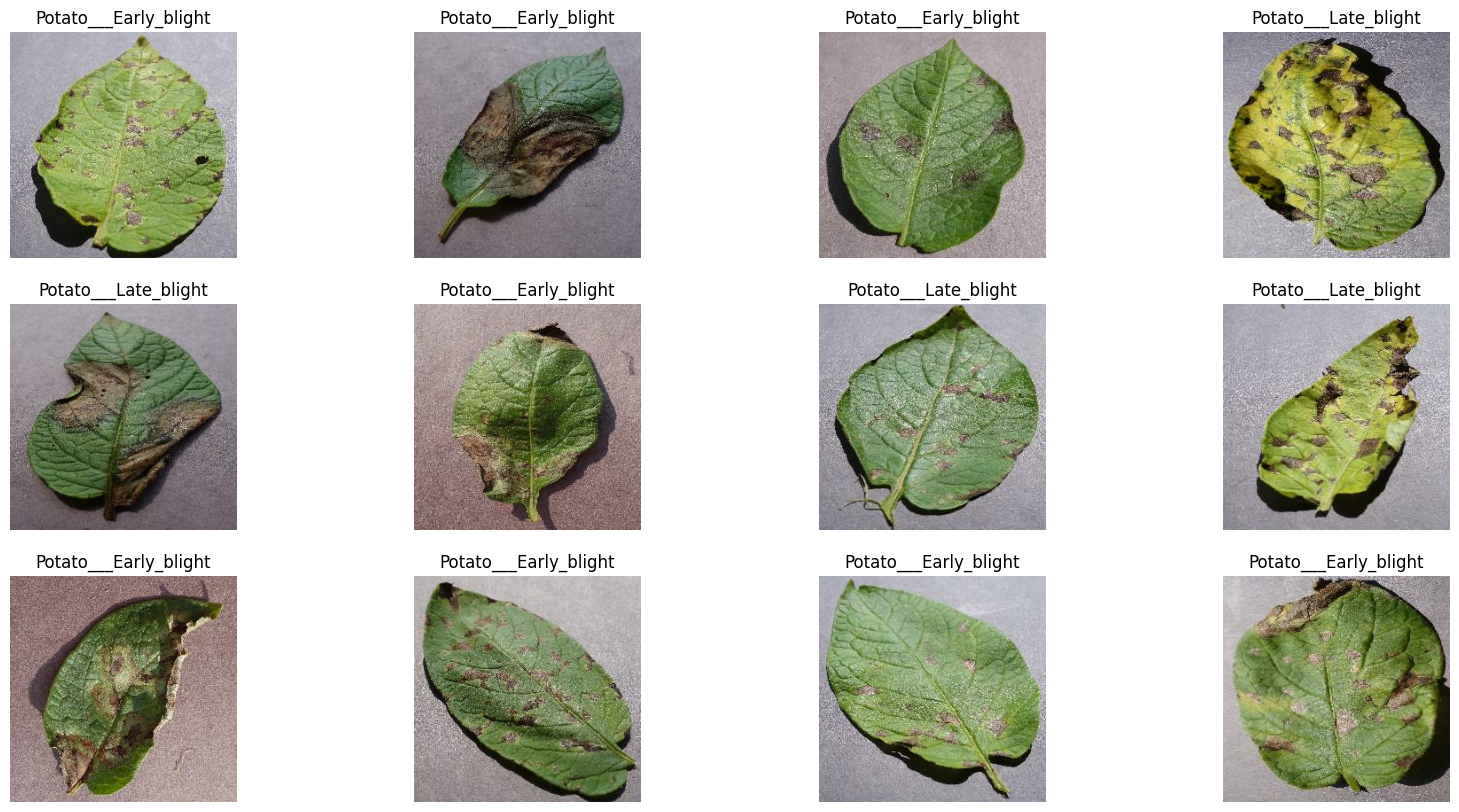

In [13]:
plt.figure(figsize=(20,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis('off')

<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Split Dataset</p>


In [14]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
        assert (train_split + test_split + val_split) == 1

        ds_size=len(ds)#68
        if shuffle:
            ds = ds.shuffle(shuffle_size, seed=12)
        train_size=int(train_split*ds_size)#0.8*68=54
        val_size=int(val_split*ds_size)#0.1*68=6
        train_ds = ds.take(train_size) #54
        val_ds = ds.skip(train_size).take(val_size)#it will skip 54 and take 6
        test_ds = ds.skip(train_size).skip(val_size)#it will skip 54 and skip  6 and take 8
        return train_ds, val_ds, test_ds


In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

8

<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:120%; text-align:center; padding: 10px; border-radius:10px;">Cache, Shuffle, and Prefetch the Dataset</p>


In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:120%; text-align:center; padding: 10px; border-radius:10px;"> Building the Model</p>


#### **<font color = #9b7a5e>Creating a Layer for Resizing and Normalization</font>**

In [20]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(Image_Size, Image_Size),
  layers.Rescaling(1./255),
])

<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:120%; text-align:center; padding: 10px; border-radius:10px;"> Data Augmentation</p>


In [21]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
#     layers.RandomZoom(0.2),
#     layers.RandomContrast(0.2),
#     layers.RandomBrightness(0.2),
#     layers.RandomTranslation(0.2, 0.2),
    # Add more data augmentation layers as needed
])


In [22]:
# #Checking what is the expected dimension order for channel
# input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# chanDim = -1
# if K.image_data_format() == "channels_first":
#     input_shape = (CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
#     batch_input_shape = (BATCH_SIZE, CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
#     chanDim = 1

In [23]:
input_shape = (Image_Size, Image_Size, Channels)
batch_input_shape = (Batch_Size, Image_Size, Image_Size, Channels)
n_classes=3

In [24]:

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=batch_input_shape)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=Batch_Size,
    validation_data=val_ds,
    verbose=1,
    epochs=Epochs,
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.4955 - loss: 0.9411 - val_accuracy: 0.7500 - val_loss: 0.8939
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6730 - loss: 0.7959 - val_accuracy: 0.7604 - val_loss: 0.5375
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8222 - loss: 0.4136 - val_accuracy: 0.8854 - val_loss: 0.2869
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8994 - loss: 0.2379 - val_accuracy: 0.9219 - val_loss: 0.1823
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9024 - loss: 0.2464 - val_accuracy: 0.8906 - val_loss: 0.3087
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9155 - loss: 0.2257 - val_accuracy: 0.8490 - val_loss: 0.3253
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9351 - loss: 0.1802 - val_accuracy: 0.9375 - val_loss: 0.1593
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9314 - loss: 0.1613 - val_accuracy: 0.9635 - 

In [28]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

[INFO] Calculating model accuracy
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9953 - loss: 0.0349
Test Accuracy: 99.61%


<p style="background-color:#D2D4C8; font-family: 'Arial Rounded MT Bold', sans-serif; color:#000000; font-size:120%; text-align:center; padding: 10px; border-radius:10px;"> Model Prediction</p>


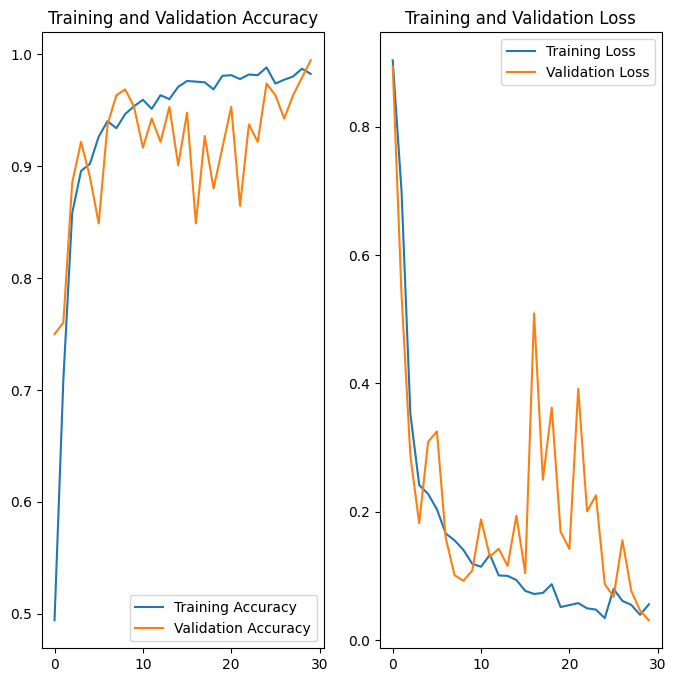

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


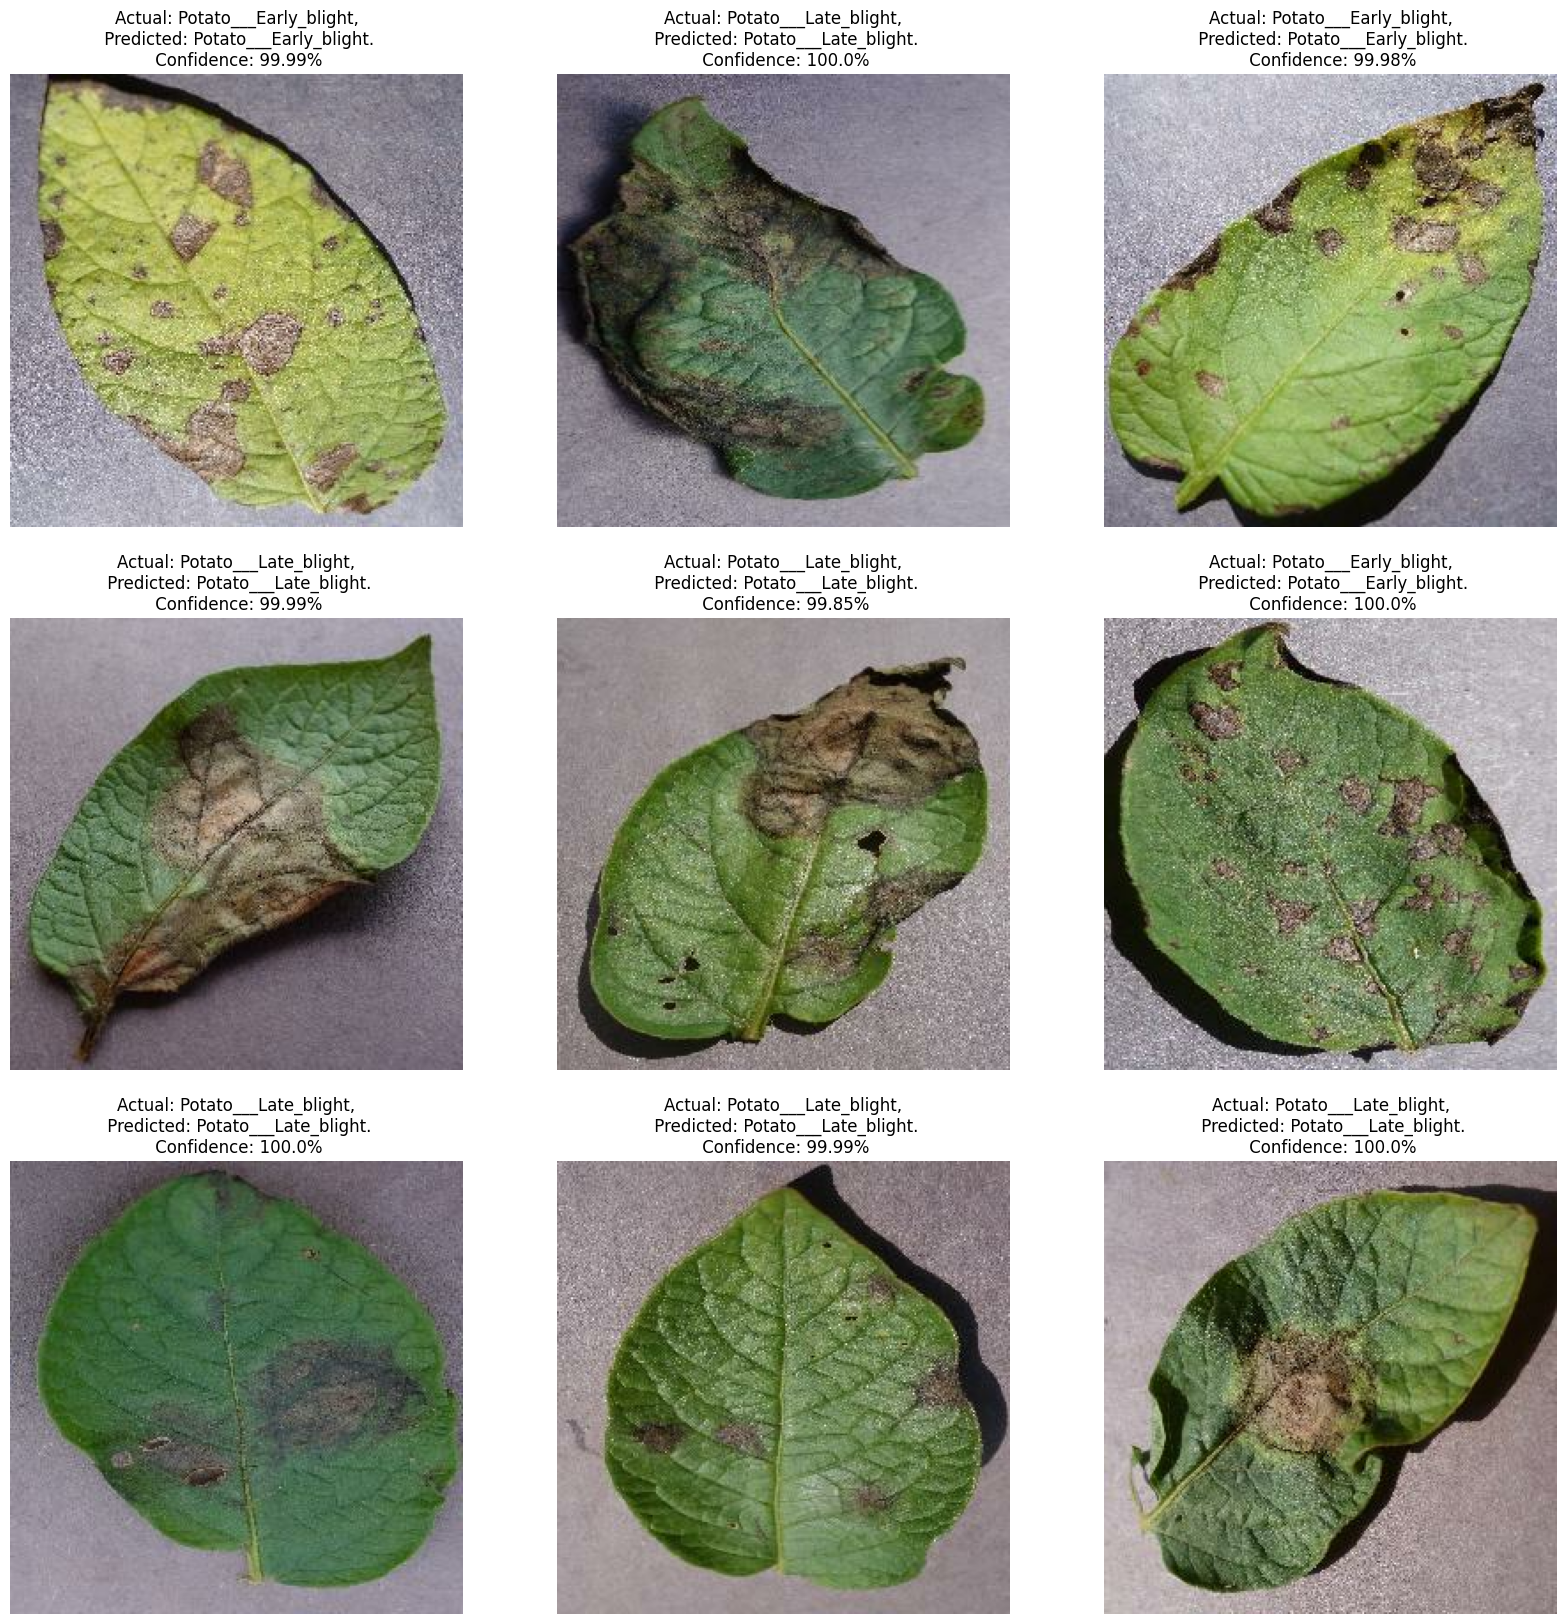

In [31]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_name[labels[i]] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

<p style="background-color:#D2D4C8;font-family:ui-rounded;color:#000000;font-size:200%;text-align:center;border-radius:30px 30px;"><a href="https://github.com/0Xuser100/Projects/tree/main/Streamlit%20End%20to%20End%20Plant_Disease_CNN_Image_Classifier" style="color:#000000; text-decoration:none;"> Click Her To Go To End_To_End_project link</a></p>
